In [12]:
import pandas as pd
import numpy as np
import random
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Activation


In [13]:
flifetime_train = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/lifetime.csv")
fspectrum_train = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/spectrum.csv")
scattering_train = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/scattering.csv")
size_pomocni_train = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/size.csv")
features_pomocni_train = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/lifetime_features.csv")
train_labels = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/train/train_labels.csv")

In [14]:
flifetime_test = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/test/lifetime.csv")
fspectrum_test = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/test/spectrum.csv")
scattering_test = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/test/scattering.csv")
size_pomocni_test = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/test/size.csv")
features_pomocni_test = pd.read_csv("C:/Users/Sonja/Desktop/LSDM PROJECT/Data/test/lifetime_features.csv")

In [15]:
def downcast_dtypes(df): #tryin to reduce memory usage
    start = df.memory_usage(deep = True).sum() / 1024**2
    float_cols = [c for c in df if df[c].dtype == 'float64']
    int_cols = [c for c in df if df[c].dtype in ['int64','int32']]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    end = df.memory_usage(deep = True).sum() / 1024**2
    saved = (start-end) / start*100
    print(f"Saved {saved:.2f}%")
    return df

In [16]:
tr1 = downcast_dtypes(flifetime_train)
test1 = downcast_dtypes(flifetime_test) 

Saved 50.26%
Saved 50.26%


In [17]:
tr2 = downcast_dtypes(fspectrum_train)
test2 = downcast_dtypes(fspectrum_test)

Saved 50.19%
Saved 50.19%


In [18]:
tr3 = downcast_dtypes(scattering_train)
test3 = downcast_dtypes(scattering_test)

Saved 50.01%
Saved 50.01%


In [19]:
tr4 = downcast_dtypes(size_pomocni_train)
test4 = downcast_dtypes(size_pomocni_test)

Saved 62.42%
Saved 62.37%


In [20]:
tr5 = downcast_dtypes(features_pomocni_train)
test5 = downcast_dtypes(features_pomocni_test)

Saved 54.97%
Saved 54.95%


In [21]:
labelsset = downcast_dtypes(train_labels)

Saved 74.90%


In [22]:
tr1_transformed = [np.array(tr1.iloc[i, 1:]).reshape(4, 24) for i in range(tr1.shape[0])]
tr2_transformed = [np.array(tr2.iloc[i, 1:]).reshape(4, 32) for i in range(tr2.shape[0])]
tr3_transformed = [np.array(tr3.iloc[i, 1:]).reshape(20, 120) for i in range(tr3.shape[0])]

In [23]:
indices = np.array(range(tr3.shape[0]))

random.seed(0)
random.shuffle(indices)

trains1 = [tr1_transformed[ind] for ind in indices]
trains2 = [tr2_transformed[ind] for ind in indices]
trains3 = [tr3_transformed[ind] for ind in indices]
labels = [labelsset['Pollen'][ind] for ind in indices]

In [24]:
ind = np.int16(np.round(0.8 * len(tr3)))

#deviding tran and validation set

train1 = trains1[:ind]
train2 = trains2[:ind]
train3 = trains3[:ind]
trainlabelss = labels[:ind]

val1 = trains1[ind:]
val2 = trains2[ind:]
val3 = trains3[ind:]
vallabelss = labels[ind:]

#transforming labels
from keras.utils import to_categorical

vallabels = to_categorical(vallabelss)
trainlabels = to_categorical(trainlabelss)

#into arrays to fit network
train1 = np.array(train1)
train2 = np.array(train2)
train3 = np.array(train3)
val1 = np.array(val1)
val2 = np.array(val2)
val3 = np.array(val3)

trainlabels = np.array(trainlabels)
vallabels = np.array(vallabels)

In [25]:
train1.shape

(4800, 4, 24)

In [26]:
val1.shape

(1200, 4, 24)

## CNN

In [48]:
#lifetime

f_cnn = Sequential()

f_cnn.add(Conv2D(12, (3,3), input_shape = (4, 24, 1), activation = 'relu', padding = 'same'))
f_cnn.add(Conv2D(24, (3,3), input_shape = (4, 24, 1), activation = 'relu', padding = 'same'))
f_cnn.add(Conv2D(36, (3,3), input_shape = (4, 24, 1), activation = 'relu', padding = 'same')) 
f_cnn.add(Conv2D(64, (3,3), input_shape = (4, 24, 1), activation = 'relu', padding = 'same')) 

f_cnn.add(MaxPool2D((2,2)))

f_cnn.add(Conv2D(64, (5,5), input_shape = (2, 12, 1), activation = 'relu', padding = 'same'))
f_cnn.add(Conv2D(128, (5,5), input_shape = (2, 12, 1), activation = 'relu', padding = 'same'))

f_cnn.add(Flatten())

f_cnn.add(Dense(64,
                activation = 'relu'))
f_cnn.add(Dense(36, activation = 'relu'))
f_cnn.add(Dense(24,activation = 'relu'))

x1 = f_cnn.output

In [49]:
#spectrum 

sp_cnn = Sequential()

sp_cnn.add(Conv2D(12, (3,3), input_shape = (4, 32, 1), activation = 'relu', padding = 'same'))
sp_cnn.add(Conv2D(24, (3,3), input_shape = (4, 32, 1), activation = 'relu', padding = 'same'))
sp_cnn.add(Conv2D(36, (3,3), input_shape = (4, 32, 1), activation = 'relu', padding = 'same')) 
sp_cnn.add(Conv2D(64, (3,3), input_shape = (4, 32, 1), activation = 'relu', padding = 'same')) 

sp_cnn.add(MaxPool2D((2,2)))

sp_cnn.add(Conv2D(64, (5,5), input_shape = (2, 16, 1), activation = 'relu', padding = 'same'))
sp_cnn.add(Conv2D(128, (5,5), input_shape = (2, 16, 1), activation = 'relu', padding = 'same'))

sp_cnn.add(Flatten())

sp_cnn.add(Dense(64, activation = 'relu'))
sp_cnn.add(Dense(36, activation = 'relu'))
sp_cnn.add(Dense(24, activation = 'relu'))

x2 = sp_cnn.output


In [50]:
# scattering

sc_cnn = Sequential()

sc_cnn.add(Conv2D(12, (5,5), input_shape = (20, 120, 1), activation = 'relu', padding = 'same'))
sc_cnn.add(Conv2D(24, (5,5), input_shape = (20, 120, 1), activation = 'relu', padding = 'same'))
sc_cnn.add(Conv2D(36, (5,5), input_shape = (20, 120, 1), activation = 'relu', padding = 'same')) 

sc_cnn.add(MaxPool2D((2,2)))

sc_cnn.add(Conv2D(36, (5,5), input_shape = (10, 60, 1), activation = 'relu', padding = 'same'))
sc_cnn.add(Conv2D(64, (5,5), input_shape = (10, 60, 1), activation = 'relu', padding = 'same'))

sc_cnn.add(MaxPool2D((2,2)))

sc_cnn.add(Conv2D(64, (5,5), input_shape = (5, 30, 1), activation = 'relu', padding = 'same'))
sc_cnn.add(Conv2D(128, (5,5), input_shape = (5, 30, 1), activation = 'relu', padding = 'same'))


sc_cnn.add(Flatten())

sc_cnn.add(Dense(128, activation = 'relu'))
sc_cnn.add(Dense(64, activation = 'relu'))
sc_cnn.add(Dense(36, activation = 'relu'))
sc_cnn.add(Dense(24,activation = 'relu'))

x3 = sc_cnn.output

In [51]:
combined = tensorflow.keras.layers.concatenate([x1, x2, x3])

In [52]:
z = Dense(12, activation="softmax")(combined)

In [53]:
model = Model(inputs=[f_cnn.input, sp_cnn.input, sc_cnn.input], outputs=z)

In [23]:
model.compile(loss = 'categorical_crossentropy', optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

callback = tensorflow.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, 
                         restore_best_weights = True)

history = model.fit([train1, train2, train3], trainlabels, batch_size = 240,
                        epochs = 30, verbose = 1, validation_data = ([val1, val2, val3], vallabels), 
                    callbacks = [callback])

Epoch 1/30
20/20 [==============================] - 1537s 75s/step - loss: 7.0477 - accuracy: 0.0988 - val_loss: 2.4587 - val_accuracy: 0.0942
Epoch 2/30
20/20 [==============================] - 1658s 82s/step - loss: 2.4142 - accuracy: 0.1273 - val_loss: 2.3224 - val_accuracy: 0.2092
Epoch 3/30
20/20 [==============================] - 1295s 64s/step - loss: 2.2333 - accuracy: 0.2212 - val_loss: 2.0641 - val_accuracy: 0.2683
Epoch 4/30
20/20 [==============================] - 1242s 63s/step - loss: 1.9927 - accuracy: 0.3252 - val_loss: 1.8879 - val_accuracy: 0.3325
Epoch 5/30
20/20 [==============================] - 1147s 58s/step - loss: 1.7842 - accuracy: 0.4198 - val_loss: 1.6831 - val_accuracy: 0.4450
Epoch 6/30
20/20 [==============================] - 1193s 60s/step - loss: 1.6444 - accuracy: 0.4594 - val_loss: 1.6206 - val_accuracy: 0.4533
Epoch 7/30
20/20 [==============================] - 1880s 96s/step - loss: 1.5641 - accuracy: 0.4919 - val_loss: 1.5163 - val_accuracy: 0.4958

In [30]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("saved")

saved


In [2]:
from tensorflow.keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model = json_file.read()
json_file.close()
model = model_from_json(loaded_model)
model.load_weights("model.h5")


In [29]:
model.save("my_model")

Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 19). These functions will not be directly callable after loading.
Assets written to: ram://9b14b053-a8f8-4bef-a40c-fa9fed782e74/assets
Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 19). These functions will not be directly callable after loading.
Assets written to: my_model\assets


In [7]:
import tensorflow
model= tensorflow.keras.models.load_model("my_model")

In [24]:
model.evaluate([val1, val2, val3], vallabels, verbose = 2)

38/38 - 97s - loss: 1.2758 - accuracy: 0.5983 - 97s/epoch - 3s/step


[1.2758103609085083, 0.5983333587646484]

In [25]:
print(model.summary()) 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_12_input (InputLayer)   [(None, 20, 120, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 20, 120, 12)  312         ['conv2d_12_input[0][0]']        
                                                                                                  
 conv2d_13 (Conv2D)             (None, 20, 120, 24)  7224        ['conv2d_12[0][0]']              
                                                                                                  
 conv2d_input (InputLayer)      [(None, 4, 24, 1)]   0           []                           

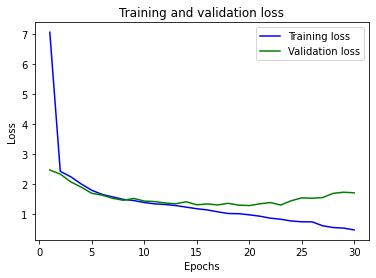

In [26]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

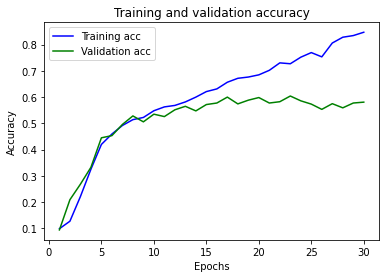

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test3transf=[np.array(test3.iloc[i, 1:]).reshape(20, 120) for i in range(test3.shape[0])]
test1transf=[np.array(test1.iloc[i, 1:]).reshape(4, 24) for i in range(test1.shape[0])]
test2transf=[np.array(test2.iloc[i, 1:]).reshape(4, 32) for i in range(test2.shape[0])]
test3=np.array(test3transf)
test1=np.array(test1transf)
test2=np.array(test2transf)

predict = model.predict([test1,test2,test3])

121/121 [==============================] - 274s 2s/step


In [28]:
prediction_algo = model.predict([val1, val2, val3])
valpred=[]
for i in prediction_algo:
    valpred.append(np.argmax(i))
valpred=pd.DataFrame(valpred)

38/38 [==============================] - 68s 2s/step


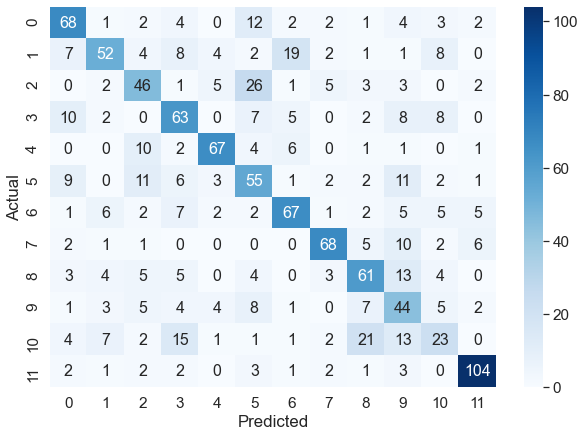

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       101
           1       0.66      0.48      0.56       108
           2       0.51      0.49      0.50        94
           3       0.54      0.60      0.57       105
           4       0.78      0.73      0.75        92
           5       0.44      0.53      0.48       103
           6       0.64      0.64      0.64       105
           7       0.78      0.72      0.75        95
           8       0.57      0.60      0.58       102
           9       0.38      0.52      0.44        84
          10       0.38      0.26      0.31        90
          11       0.85      0.86      0.85       121

    accuracy                           0.60      1200
   macro avg       0.60      0.59      0.59      1200
weighted avg       0.60      0.60      0.60      1200



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn
cm_algo = confusion_matrix(vallabelss, valpred)
heat_cm = pd.DataFrame(cm_algo, columns=(0,1,2,3,4,5,6,7,8,9,10,11), index =(0,1,2,3,4,5,6,7,8,9,10,11))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
seaborn.set(font_scale=1.4) # For label size
seaborn.heatmap(heat_cm,cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
cm_algo=plt.show()
    
report = print(classification_report(vallabelss, valpred))

In [32]:
xlsfile = 'pandas_to_excel.xlsx'
writer = pd.ExcelWriter(xlsfile, engine='xlsxwriter')

ypred.to_excel('submissioncnnall.xlsx', sheet_name='new_sheet_name')

## Adding additional 2 datasets to output of CNN and using that as input to XGBoost

In [33]:
train_ml = model.predict([train1,train2,train3])
val_ml = model.predict([val1,val2,val3])


38/38 [==============================] - 67s 2s/step


In [34]:
indices = np.array(range(tr3.shape[0]))

random.seed(0)
random.shuffle(indices)
ind = np.int16(np.round(0.8 * len(tr3)))

#deviding tran and validation set

pom1 = tr4[:ind]
pom2 = tr5[:ind]
valpom1 = tr4[ind:]
valpom2 = tr5[ind:]
vallabelss = labels[ind:]

In [35]:
p=pd.merge(pom1,pom2)

In [36]:
v=pd.merge(valpom1,valpom2)

In [37]:
p=p.drop('ID',axis=1)

In [38]:
v=v.drop('ID',axis=1)

In [39]:
t=pd.DataFrame(train_ml)

In [40]:
tv=pd.DataFrame(val_ml)

In [41]:
fin=pd.merge(t,p,left_index=True, right_index=True)

In [42]:
finval=pd.merge(tv,v,left_index=True, right_index=True)

In [284]:
def machine_learning(algorithm):
    algorithm.fit(fin, trainlabelss)
    
    prediction_algo = algorithm.predict(finval)
    cm_algo = confusion_matrix(vallabelss, prediction_algo)
    heat_cm = pd.DataFrame(cm_algo, columns=(0,1,2,3,4,5,6,7,8,9,10,11), index =(0,1,2,3,4,5,6,7,8,9,10,11))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    seaborn.set(font_scale=1.4) # For label size
    seaborn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
    cm_algo=plt.show()
    
    report = print(classification_report(vallabelss, prediction_algo))
  
    return cm_algo, report

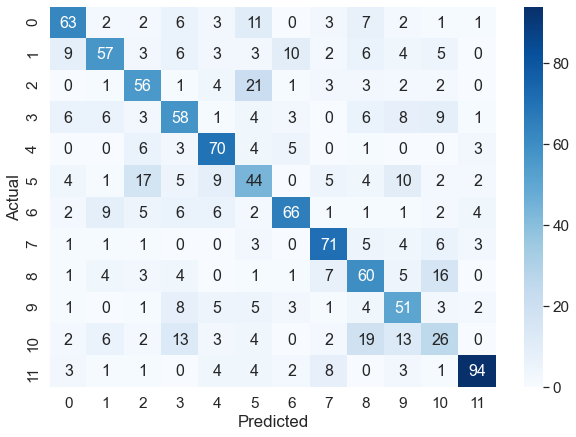

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       101
           1       0.65      0.53      0.58       108
           2       0.56      0.60      0.58        94
           3       0.53      0.55      0.54       105
           4       0.65      0.76      0.70        92
           5       0.42      0.43      0.42       103
           6       0.73      0.63      0.67       105
           7       0.69      0.75      0.72        95
           8       0.52      0.59      0.55       102
           9       0.50      0.61      0.55        84
          10       0.36      0.29      0.32        90
          11       0.85      0.78      0.81       121

    accuracy                           0.60      1200
   macro avg       0.59      0.59      0.59      1200
weighted avg       0.60      0.60      0.60      1200



In [287]:
#%% XGBoost
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

import seaborn
xgboost = XGBClassifier(objective = 'multiclass : softmax')

xgb_cm, xgb_report = machine_learning(xgboost)

preprocessing of test data

In [43]:
pomtest=pd.merge(test4,test5).drop('ID',axis=1)

In [44]:
finaltest=pd.merge(pd.DataFrame(predict), pomtest, left_index=True, right_index=True)

In [45]:
finaltest

,0,1,2,3,4,5,6,7,8,9,10,11,size,lt feature 1,lt feature 2,lt feature 3,lt feature 4
0,0.004191,0.010426,0.046337,0.025567,0.001341,0.127599,0.000845,0.010047,0.019044,0.650073,0.104157,0.000374,30.752787,0.853280,1.000000,0.657596,0.170519
1,0.000212,0.007878,0.017163,0.002843,0.000130,0.011769,0.000849,0.002111,0.000673,0.918490,0.032751,0.005130,35.027672,0.823714,1.000000,0.619438,-0.002691
2,0.852616,0.058287,0.000174,0.009924,0.000005,0.000204,0.050347,0.000016,0.009578,0.000096,0.018606,0.000147,22.178818,0.465441,1.000000,0.212438,0.018943
3,0.010262,0.129042,0.000114,0.443257,0.002177,0.040958,0.048170,0.000002,0.048296,0.007218,0.270504,0.000001,41.726349,0.616071,1.000000,0.948248,0.000212
4,0.006477,0.009586,0.011496,0.297800,0.011585,0.001868,0.643855,0.000003,0.000371,0.007375,0.009468,0.000114,33.576382,0.745478,0.924289,1.000000,0.204651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,0.086748,0.005033,0.053703,0.028961,0.000499,0.362253,0.002374,0.058446,0.000474,0.005141,0.002515,0.393853,28.959412,0.706934,1.000000,0.323072,-0.010012
3862,0.001074,0.002246,0.061337,0.009093,0.004841,0.709644,0.000359,0.003971,0.001727,0.190977,0.010124,0.004607,30.270859,1.000000,0.714122,0.671445,0.014005
3863,0.020865,0.005947,0.068510,0.009307,0.008636,0.279737,0.001700,0.006804,0.244784,0.202527,0.150997,0.000187,29.448887,1.000000,0.699150,0.200982,-0.026818
3864,0.000684,0.285615,0.000330,0.051735,0.000951,0.013139,0.005429,0.000602,0.306503,0.131418,0.203526,0.000069,31.472961,0.463425,1.000000,0.588778,0.000543


prediction final

In [291]:
ypred2=xgboost.predict(finaltest)
ypred2=pd.DataFrame(ypred2)
ypred2

,0
0,9
1,9
2,0
3,10
4,6
...,...
3861,11
3862,5
3863,9
3864,10


In [292]:
xlsfile = 'pandas_to_excel.xlsx'
writer = pd.ExcelWriter(xlsfile, engine='xlsxwriter')

ypred2.to_excel('submissioncnnallfinal.xlsx', sheet_name='new_sheet_name')

## Cnn as feature extraction and XGBoost as classifier

In [95]:
feature_extr = tensorflow.keras.Model(inputs = [f_cnn.input, sp_cnn.input, sc_cnn.input],
                                      outputs = [f_cnn.get_layer(index=((len(f_cnn.layers)-3))).output,
                                                 sp_cnn.get_layer(index=((len(sp_cnn.layers)-3))).output,
                                                 sc_cnn.get_layer(index=((len(sc_cnn.layers)-4))).output])

tr = feature_extr.predict([train1,train2,train3])
vl = feature_extr.predict([val1,val2,val3])

38/38 [==============================] - 70s 2s/step


In [96]:
tr1= pd.DataFrame(tr[0])
tr2 = pd.DataFrame(tr[1])
tr3 = pd.DataFrame(tr[2])
tr = pd.merge(pd.merge(tr1,tr2,left_index=True, right_index=True),tr3,left_index=True, right_index=True)


vl1= pd.DataFrame(vl[0])
vl2 = pd.DataFrame(vl[1])
vl3 = pd.DataFrame(vl[2])
vl = pd.merge(pd.merge(vl1,vl2,left_index=True, right_index=True),vl3,left_index=True, right_index=True)


In [97]:
vl

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,118,119,120,121,122,123,124,125,126,127
0,0.001040,0.000000,0.000915,0.000000,0.000000,0.001279,0.000000,0.000038,0.0,0.000075,...,2.800057,0.000000,8.825472,38.417530,0.339933,51.228973,0.0,32.554161,0.0,80.378601
1,0.001016,0.000000,0.000038,0.000064,0.000000,0.001243,0.000000,0.000000,0.0,0.000370,...,0.123656,0.000000,34.561069,46.056263,3.862458,29.141754,0.0,45.069210,0.0,57.045807
2,0.001220,0.000000,0.000433,0.000245,0.000000,0.001475,0.000000,0.000000,0.0,0.000088,...,0.000000,0.000000,29.839163,63.399597,0.000000,21.566994,0.0,37.131088,0.0,70.750206
3,0.001723,0.000000,0.000098,0.000874,0.000835,0.002671,0.000000,0.000000,0.0,0.001981,...,0.804477,0.000000,35.827820,49.379147,12.573050,12.900087,0.0,46.354599,0.0,44.212013
4,0.000741,0.000000,0.000174,0.000094,0.000000,0.001533,0.000000,0.000000,0.0,0.000766,...,0.000000,0.000000,30.185444,40.257137,5.751390,17.086651,0.0,37.900787,0.0,41.097939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.001421,0.000000,0.000288,0.000207,0.000000,0.002091,0.000000,0.000000,0.0,0.000686,...,0.000000,0.000000,24.159618,41.729424,9.530561,17.936989,0.0,35.992317,0.0,29.194309
1196,0.001167,0.000813,0.001151,0.000000,0.000000,0.001553,0.001953,0.000000,0.0,0.001067,...,0.000000,0.000000,23.771297,43.077507,8.862816,21.355198,0.0,34.663239,0.0,48.591904
1197,0.001210,0.000000,0.000000,0.000350,0.000000,0.001543,0.000000,0.000000,0.0,0.000427,...,7.588066,0.000000,13.292878,30.502800,0.250393,17.327969,0.0,24.860594,0.0,54.498787
1198,0.001073,0.000000,0.000636,0.000393,0.000092,0.001474,0.000000,0.000592,0.0,0.000000,...,0.000000,0.000000,18.035503,35.905357,3.860128,13.412503,0.0,32.139240,0.0,49.207386


In [98]:
fin=pd.merge(tr,p,left_index=True, right_index=True)

In [99]:
finval=pd.merge(vl,v,left_index=True, right_index=True)

In [100]:
def machine_learning(algorithm):
    algorithm.fit(fin, trainlabelss)
    
    prediction_algo = algorithm.predict(finval)
    cm_algo = confusion_matrix(vallabelss, prediction_algo)
    heat_cm = pd.DataFrame(cm_algo, columns=(0,1,2,3,4,5,6,7,8,9,10,11), index =(0,1,2,3,4,5,6,7,8,9,10,11))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'
    plt.figure(figsize = (5,5))
    seaborn.set(font_scale=1.4) # For label size
    seaborn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16},fmt='g')# font size
    cm_algo=plt.show()
    
    report = print(classification_report(vallabelss, prediction_algo))
  
    return cm_algo, report

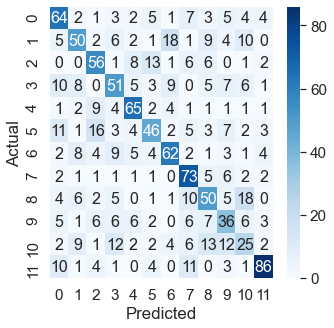

              precision    recall  f1-score   support

           0       0.55      0.63      0.59       101
           1       0.56      0.46      0.51       108
           2       0.55      0.60      0.57        94
           3       0.50      0.49      0.49       105
           4       0.65      0.71      0.68        92
           5       0.55      0.45      0.49       103
           6       0.61      0.59      0.60       105
           7       0.57      0.77      0.65        95
           8       0.49      0.49      0.49       102
           9       0.40      0.43      0.42        84
          10       0.32      0.28      0.30        90
          11       0.80      0.71      0.75       121

    accuracy                           0.55      1200
   macro avg       0.55      0.55      0.54      1200
weighted avg       0.55      0.55      0.55      1200



In [109]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgboost = XGBClassifier(objective='multi:softprob', 
                      num_class= 12)

xgb_cm, xgb_report = machine_learning(xgboost)

In [102]:
intermediate_test_output = feature_extr.predict([test1,test2,test3])
intermediate_test_output = pd.merge(pd.merge(pd.DataFrame(intermediate_test_output[0]),
                                             pd.DataFrame(intermediate_test_output[1]),left_index=True, right_index=True),
                                    pd.DataFrame(intermediate_test_output[2]),left_index=True, right_index=True)


121/121 [==============================] - 301s 2s/step


In [103]:
finaltest=pd.merge(intermediate_test_output, pomtest, left_index=True, right_index=True)

In [105]:
ypredfinal1 = xgboost.predict(finaltest)

In [106]:
ypredfin1 = pd.DataFrame(ypredfinal1)

In [107]:
ypredfin1

,0
0,9
1,5
2,0
3,1
4,6
...,...
3861,11
3862,5
3863,5
3864,9


In [108]:
xlsfile = 'pandas_to_excel.xlsx'
writer = pd.ExcelWriter(xlsfile, engine='xlsxwriter')

ypredfin1.to_excel('submissionfinal.xlsx', sheet_name='new_sheet_name')